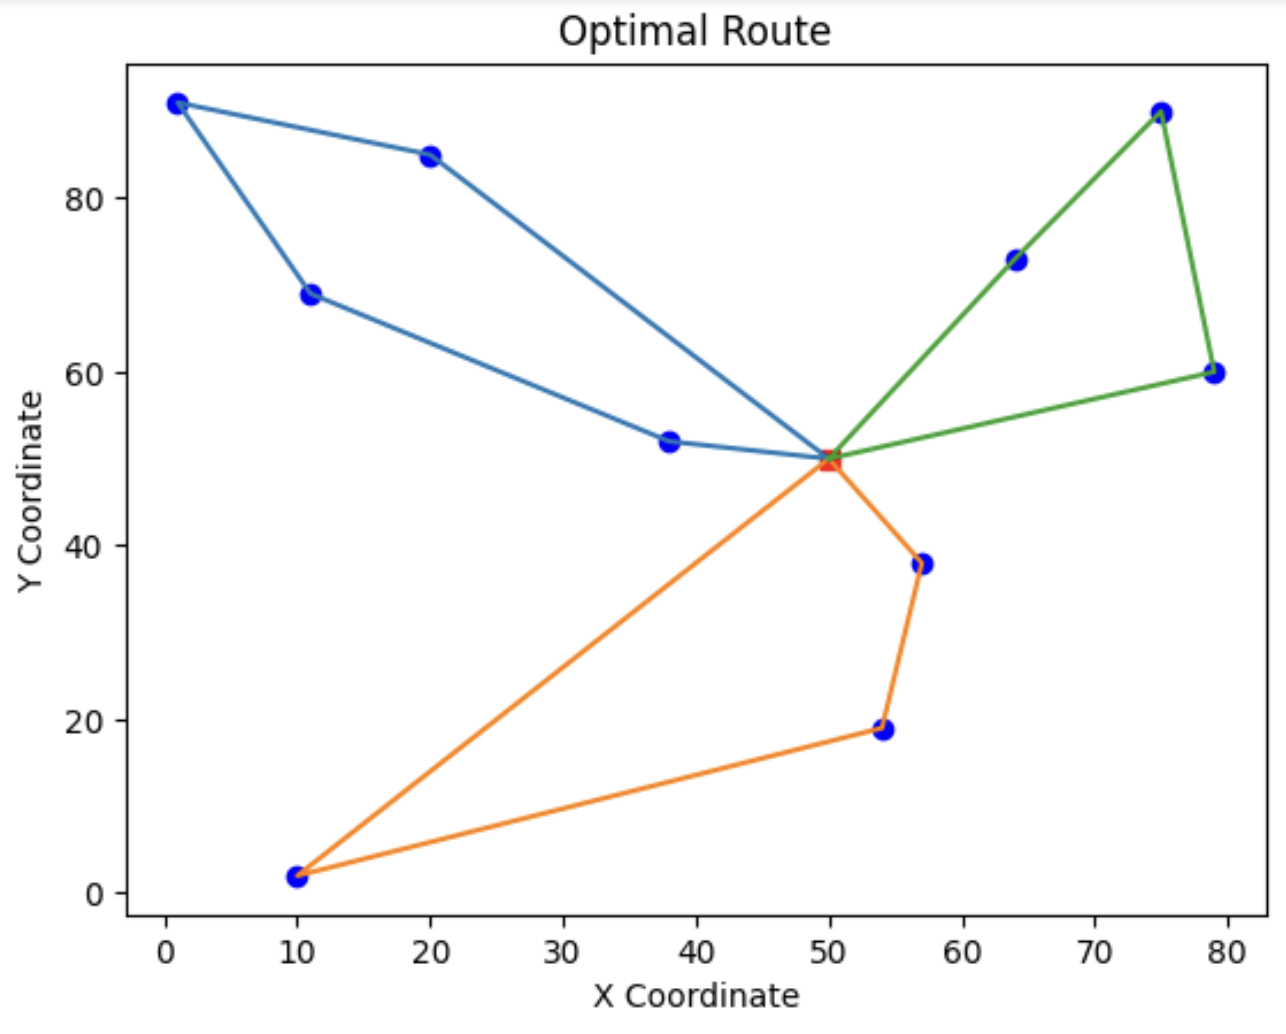

In [1]:
# Install necessary libraries
!pip install matplotlib==3.7.2 deap==1.3.3

# Import necessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from IPython import get_ipython
from IPython.display import display




In [42]:

# Define the problem parameters
num_locations = 10  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


In [43]:


# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)  # Register the evaluate function


# Genetic Operators
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection


In [44]:

# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure(figsize=(8, 8))
    plt.title(title)

    # Plot depot
    plt.scatter(depot[0], depot[1], marker='s', color='black', s=100, label='Depot')

    # Plot locations and routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        route_x = [loc[0] for loc in vehicle_route]
        route_y = [loc[1] for loc in vehicle_route]
        plt.plot(route_x, route_y, marker='o', label=f'Vehicle {i+1}')

    plt.legend()
    plt.show()


In [45]:


# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)  # Run the genetic algorithm

    return pop, stats, hof

if __name__ == "__main__":
    pop, stats, hof = main()  # Call the main function


gen	nevals	avg    	min    
0  	300   	275.737	1.13121
1  	220   	260.734	2.93478
2  	240   	256.162	2.93478
3  	229   	254.356	3.65682
4  	228   	249.898	2.83396
5  	218   	245.163	2.83396
6  	220   	241.868	1.77584
7  	232   	239.666	0.687208
8  	223   	235.974	1.655   
9  	219   	230.828	1.655   
10 	251   	231.808	0.816651
11 	221   	222.599	0.816651
12 	221   	216.737	2.65598 
13 	212   	206.377	2.10854 
14 	216   	199.471	4.594   
15 	222   	196.429	4.594   
16 	229   	188.448	0.687208
17 	230   	183.865	2.77852 
18 	228   	183.751	7.70775 
19 	244   	180.939	8.22082 
20 	223   	180.575	11.4605 
21 	222   	182.21 	1.63903 
22 	223   	181.662	18.2661 
23 	218   	181.265	12.2136 
24 	240   	181.088	15.0236 
25 	227   	181.178	1.80115 
26 	235   	180.733	1.80115 
27 	235   	182.667	1.80115 
28 	235   	181.927	8.36805 
29 	240   	182.175	1.80115 
30 	235   	181.481	11.1872 
31 	232   	180.944	11.1872 
32 	229   	181.333	11.1872 
33 	243   	182.073	1.80115 
34 	214   	181.237	1.80115 


Best individual: [5, 8, 3, 4, 1, 7, 0, 9, 6, 2]
Best fitness: (332.2950536777827, 23.86478443820736)


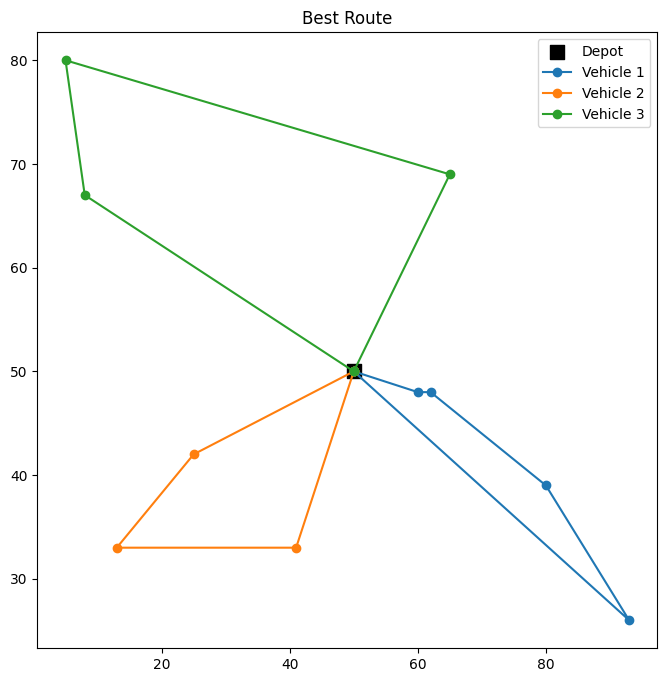

In [46]:

    # Print the results
    best_individual = hof[0]
    print("Best individual:", best_individual)
    print("Best fitness:", best_individual.fitness.values)

    # Visualize the best route
    plot_routes(best_individual, title="Best Route")